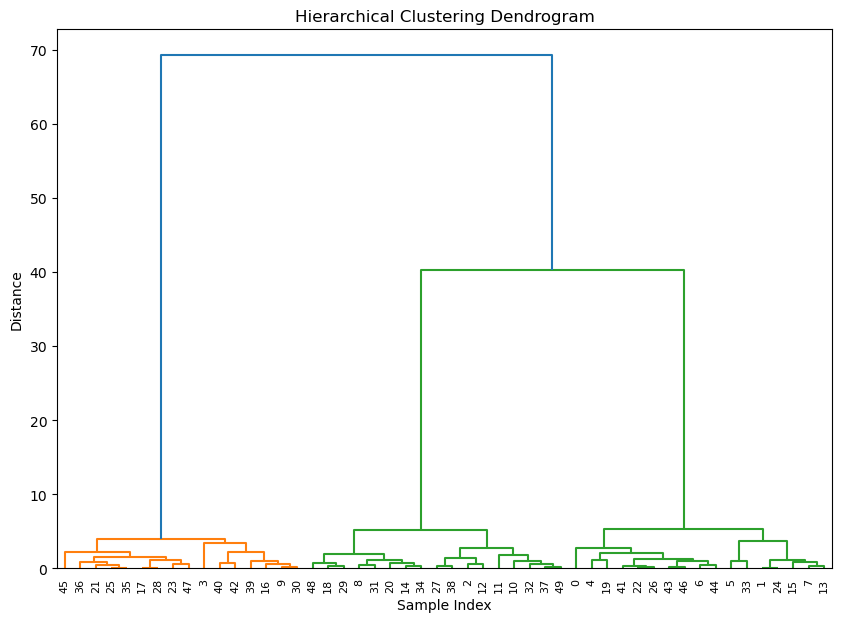

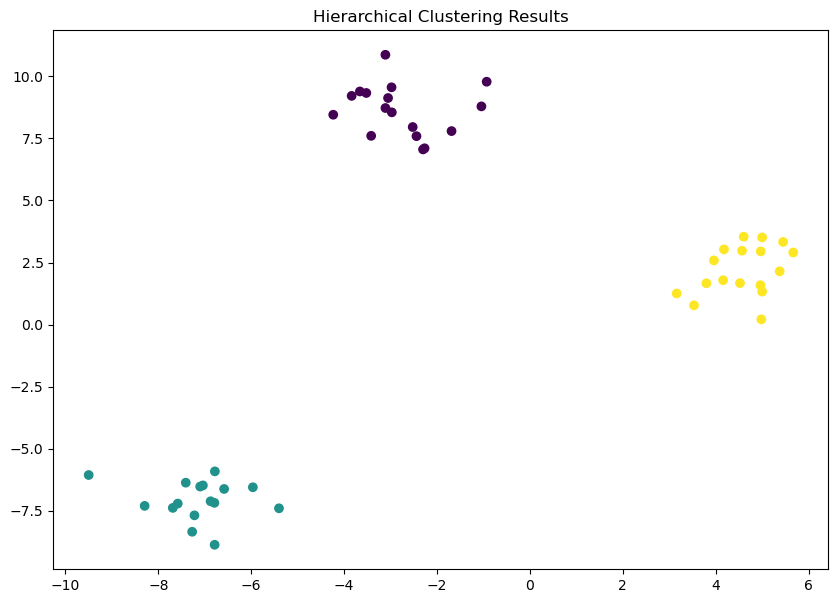

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=50, centers=3, random_state=42)

# Create linkage matrix for dendrogram
linkage_matrix = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=3)
clusters = clustering.fit_predict(X)

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering Results')

# Function to demonstrate how hierarchical clustering works
def demonstrate_hierarchical_clustering(X, n_clusters):
    # Calculate distance matrix
    n_samples = len(X)
    distances = np.zeros((n_samples, n_samples))
    
    for i in range(n_samples):
        for j in range(n_samples):
            distances[i,j] = np.sqrt(np.sum((X[i] - X[j])**2))
    
    # Initialize each point as a cluster
    clusters = [[i] for i in range(n_samples)]
    
    while len(clusters) > n_clusters:
        # Find closest clusters
        min_dist = float('inf')
        merge_idx = (0, 0)
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                # Calculate average linkage
                cluster_dist = 0
                pairs = 0
                for pi in clusters[i]:
                    for pj in clusters[j]:
                        cluster_dist += distances[pi,pj]
                        pairs += 1
                cluster_dist /= pairs
                
                if cluster_dist < min_dist:
                    min_dist = cluster_dist
                    merge_idx = (i, j)
        
        # Merge closest clusters
        clusters[merge_idx[0]].extend(clusters[merge_idx[1]])
        clusters.pop(merge_idx[1])
    
    return clusters

# Example usage
final_clusters = demonstrate_hierarchical_clustering(X, 3)